# 📚 Table of Contents

1. Load Text Documents
2. Tokenize Documents
3. Compute Term Frequency (TF)
4. Compute Document Frequency (DF)
5. Compute Inverse Document Frequency (IDF)
6. Compute TF-IDF for Each Document
7. Display TF-IDF Values for Each Document
8. Visualize TF-IDF Scores (Bar Charts)
9. Create TF-IDF Table (DataFrame)
10. Search Query Using Cosine Similarity

# 📗 Import Libraries


In [ ]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 1️⃣ Load Text Documents

In [ ]:
folder_path = "/content/drive/MyDrive/documents"
file_names = sorted([f for f in os.listdir(folder_path) if f.endswith(".txt")])

In [ ]:
file_names

['doc1.txt',
 'doc10.txt',
 'doc2.txt',
 'doc3.txt',
 'doc4.txt',
 'doc5.txt',
 'doc6.txt',
 'doc7.txt',
 'doc8.txt',
 'doc9.txt']

In [ ]:
documents = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    print(file_path)
    with open(file_path, "r") as file:
        document = file.read()
        documents.append(document)

/content/drive/MyDrive/documents/doc1.txt
/content/drive/MyDrive/documents/doc10.txt
/content/drive/MyDrive/documents/doc2.txt
/content/drive/MyDrive/documents/doc3.txt
/content/drive/MyDrive/documents/doc4.txt
/content/drive/MyDrive/documents/doc5.txt
/content/drive/MyDrive/documents/doc6.txt
/content/drive/MyDrive/documents/doc7.txt
/content/drive/MyDrive/documents/doc8.txt
/content/drive/MyDrive/documents/doc9.txt


In [ ]:
documents

['Diabetes is a chronic disease that affects how the body regulates blood sugar levels. Patients with diabetes may require insulin to manage their glucose. The doctor monitors blood sugar regularly to adjust treatment. Symptoms include increased thirst, frequent urination, and fatigue.',
 'Obesity is a condition characterized by excessive body weight and a high BMI. It increases the risk of heart disease, diabetes, and other health issues. Doctors recommend diet, exercise, and sometimes medication to manage weight effectively.',
 'Hypertension, also known as high blood pressure, is a cardiovascular condition. It causes the arteries to narrow, raising the risk of heart disease and stroke. Doctors recommend regular monitoring and medication. Lifestyle changes like exercise and diet help control blood pressure.',
 'Heart disease impacts the cardiovascular system, including the heart and arteries. High cholesterol and hypertension are common risk factors. Patients might require medication,

# 2️⃣ Tokenize Documents

In [ ]:
def tokenize(text):
    text = text.lower()
    for punc in ['.', ',', '!', '?']:
        text = text.replace(punc, '')
    tokens = text.split()
    return tokens

In [ ]:
tokenized_docs = [tokenize(doc) for doc in documents]
tokenized_docs

[['diabetes',
  'is',
  'a',
  'chronic',
  'disease',
  'that',
  'affects',
  'how',
  'the',
  'body',
  'regulates',
  'blood',
  'sugar',
  'levels',
  'patients',
  'with',
  'diabetes',
  'may',
  'require',
  'insulin',
  'to',
  'manage',
  'their',
  'glucose',
  'the',
  'doctor',
  'monitors',
  'blood',
  'sugar',
  'regularly',
  'to',
  'adjust',
  'treatment',
  'symptoms',
  'include',
  'increased',
  'thirst',
  'frequent',
  'urination',
  'and',
  'fatigue'],
 ['obesity',
  'is',
  'a',
  'condition',
  'characterized',
  'by',
  'excessive',
  'body',
  'weight',
  'and',
  'a',
  'high',
  'bmi',
  'it',
  'increases',
  'the',
  'risk',
  'of',
  'heart',
  'disease',
  'diabetes',
  'and',
  'other',
  'health',
  'issues',
  'doctors',
  'recommend',
  'diet',
  'exercise',
  'and',
  'sometimes',
  'medication',
  'to',
  'manage',
  'weight',
  'effectively'],
 ['hypertension',
  'also',
  'known',
  'as',
  'high',
  'blood',
  'pressure',
  'is',
  'a',
  

In [ ]:
for i, doc in enumerate(documents):
    print(f"Document {i} is {tokenize(doc)}")

Document 0 is ['diabetes', 'is', 'a', 'chronic', 'disease', 'that', 'affects', 'how', 'the', 'body', 'regulates', 'blood', 'sugar', 'levels', 'patients', 'with', 'diabetes', 'may', 'require', 'insulin', 'to', 'manage', 'their', 'glucose', 'the', 'doctor', 'monitors', 'blood', 'sugar', 'regularly', 'to', 'adjust', 'treatment', 'symptoms', 'include', 'increased', 'thirst', 'frequent', 'urination', 'and', 'fatigue']
Document 1 is ['obesity', 'is', 'a', 'condition', 'characterized', 'by', 'excessive', 'body', 'weight', 'and', 'a', 'high', 'bmi', 'it', 'increases', 'the', 'risk', 'of', 'heart', 'disease', 'diabetes', 'and', 'other', 'health', 'issues', 'doctors', 'recommend', 'diet', 'exercise', 'and', 'sometimes', 'medication', 'to', 'manage', 'weight', 'effectively']
Document 2 is ['hypertension', 'also', 'known', 'as', 'high', 'blood', 'pressure', 'is', 'a', 'cardiovascular', 'condition', 'it', 'causes', 'the', 'arteries', 'to', 'narrow', 'raising', 'the', 'risk', 'of', 'heart', 'disease

# 3️⃣ Compute Term Frequency (TF)

In [ ]:
def compute_tf(doc_tokens):
    tf_dict = {}
    total_terms = len(doc_tokens)
    for word in doc_tokens:
        tf_dict[word] = tf_dict.get(word, 0) + 1
    for word in tf_dict:
        tf_dict[word] /= total_terms
    return tf_dict

tfs = [compute_tf(doc) for doc in tokenized_docs]

In [ ]:
tfs

[{'diabetes': 0.04878048780487805,
  'is': 0.024390243902439025,
  'a': 0.024390243902439025,
  'chronic': 0.024390243902439025,
  'disease': 0.024390243902439025,
  'that': 0.024390243902439025,
  'affects': 0.024390243902439025,
  'how': 0.024390243902439025,
  'the': 0.04878048780487805,
  'body': 0.024390243902439025,
  'regulates': 0.024390243902439025,
  'blood': 0.04878048780487805,
  'sugar': 0.04878048780487805,
  'levels': 0.024390243902439025,
  'patients': 0.024390243902439025,
  'with': 0.024390243902439025,
  'may': 0.024390243902439025,
  'require': 0.024390243902439025,
  'insulin': 0.024390243902439025,
  'to': 0.04878048780487805,
  'manage': 0.024390243902439025,
  'their': 0.024390243902439025,
  'glucose': 0.024390243902439025,
  'doctor': 0.024390243902439025,
  'monitors': 0.024390243902439025,
  'regularly': 0.024390243902439025,
  'adjust': 0.024390243902439025,
  'treatment': 0.024390243902439025,
  'symptoms': 0.024390243902439025,
  'include': 0.024390243902

# 4️⃣ Compute Document Frequency (DF)

In [ ]:
def compute_df(tokenized_docs):
    df_dict = {}
    for doc in tokenized_docs:
        for term in set(doc):
            df_dict[term] = df_dict.get(term, 0) + 1
    return df_dict

df = compute_df(tokenized_docs)
print("\n📊 Document Frequency (DF):")
for term, freq in list(df.items()):
    print(f"{term}: {freq}")


📊 Document Frequency (DF):
symptoms: 5
require: 2
urination: 2
may: 3
glucose: 1
frequent: 1
a: 5
is: 6
the: 9
their: 1
levels: 1
and: 8
manage: 4
regularly: 3
sugar: 1
with: 1
affects: 2
thirst: 1
increased: 1
blood: 4
adjust: 1
monitors: 1
include: 4
to: 8
body: 2
how: 1
regulates: 1
chronic: 1
doctor: 1
treatment: 4
fatigue: 2
diabetes: 2
disease: 6
insulin: 1
patients: 6
that: 1
increases: 1
obesity: 1
by: 3
diet: 2
bmi: 1
high: 3
issues: 1
exercise: 2
medication: 4
effectively: 2
condition: 2
doctors: 9
it: 3
characterized: 2
of: 5
heart: 3
excessive: 1
other: 1
risk: 3
health: 2
recommend: 3
sometimes: 1
weight: 1
cardiovascular: 2
narrow: 2
arteries: 2
hypertension: 2
stroke: 2
pressure: 1
changes: 4
raising: 1
causes: 2
help: 1
also: 1
known: 1
as: 2
like: 1
lifestyle: 3
monitoring: 1
regular: 1
control: 1
surgery: 2
closely: 1
common: 1
impacts: 1
might: 1
cholesterol: 1
are: 2
or: 4
including: 1
factors: 1
monitor: 4
system: 1
blocked: 1
brain: 1
sudden: 1
imaging: 1
requiri

# 5️⃣ Compute Inverse Document Frequency (IDF)

In [ ]:
total_docs = len(documents)
idf = {term: math.log(total_docs / df_count) for term, df_count in df.items()}

print("\n📊 Inverse Document Frequency (IDF):")
for term, idf_value in list(idf.items()):
    print(f"{term}: {idf_value:.4f}")


📊 Inverse Document Frequency (IDF):
symptoms: 0.6931
require: 1.6094
urination: 1.6094
may: 1.2040
glucose: 2.3026
frequent: 2.3026
a: 0.6931
is: 0.5108
the: 0.1054
their: 2.3026
levels: 2.3026
and: 0.2231
manage: 0.9163
regularly: 1.2040
sugar: 2.3026
with: 2.3026
affects: 1.6094
thirst: 2.3026
increased: 2.3026
blood: 0.9163
adjust: 2.3026
monitors: 2.3026
include: 0.9163
to: 0.2231
body: 1.6094
how: 2.3026
regulates: 2.3026
chronic: 2.3026
doctor: 2.3026
treatment: 0.9163
fatigue: 1.6094
diabetes: 1.6094
disease: 0.5108
insulin: 2.3026
patients: 0.5108
that: 2.3026
increases: 2.3026
obesity: 2.3026
by: 1.2040
diet: 1.6094
bmi: 2.3026
high: 1.2040
issues: 2.3026
exercise: 1.6094
medication: 0.9163
effectively: 1.6094
condition: 1.6094
doctors: 0.1054
it: 1.2040
characterized: 1.6094
of: 0.6931
heart: 1.2040
excessive: 2.3026
other: 2.3026
risk: 1.2040
health: 1.6094
recommend: 1.2040
sometimes: 2.3026
weight: 2.3026
cardiovascular: 1.6094
narrow: 1.6094
arteries: 1.6094
hypertension

# 6️⃣ Compute TF-IDF for Each Document

In [ ]:
def compute_tfidf(tf_dict, idf_dict):
    return {term: tf_val * idf_dict[term] for term, tf_val in tf_dict.items()}

tfidf_docs = [compute_tfidf(tf, idf) for tf in tfs]

In [ ]:
tfidf_docs

[{'diabetes': 0.07850916646020002,
  'is': 0.012459161555268067,
  'a': 0.016906028794145007,
  'chronic': 0.05616061202424502,
  'disease': 0.012459161555268067,
  'that': 0.05616061202424502,
  'affects': 0.03925458323010001,
  'how': 0.05616061202424502,
  'the': 0.005139537349162261,
  'body': 0.03925458323010001,
  'regulates': 0.05616061202424502,
  'blood': 0.04469710887191001,
  'sugar': 0.11232122404849004,
  'levels': 0.05616061202424502,
  'patients': 0.012459161555268067,
  'with': 0.05616061202424502,
  'may': 0.029365190349413078,
  'require': 0.03925458323010001,
  'insulin': 0.05616061202424502,
  'to': 0.010885051283619988,
  'manage': 0.022348554435955004,
  'their': 0.05616061202424502,
  'glucose': 0.05616061202424502,
  'doctor': 0.05616061202424502,
  'monitors': 0.05616061202424502,
  'regularly': 0.029365190349413078,
  'adjust': 0.05616061202424502,
  'treatment': 0.022348554435955004,
  'symptoms': 0.016906028794145007,
  'include': 0.022348554435955004,
  'in

# 7️⃣ Display TF-IDF Values for Each Document

In [ ]:
for idx, tfidf in enumerate(tfidf_docs):
    print(f"\n📄 Document {idx + 1} ({file_names[idx]}) All Keywords (by TF-IDF):")
    sorted_tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)
    for term, score in sorted_tfidf:
        print(f"{term}: {score:.4f}")


📄 Document 1 (doc1.txt) All Keywords (by TF-IDF):
sugar: 0.1123
diabetes: 0.0785
chronic: 0.0562
that: 0.0562
how: 0.0562
regulates: 0.0562
levels: 0.0562
with: 0.0562
insulin: 0.0562
their: 0.0562
glucose: 0.0562
doctor: 0.0562
monitors: 0.0562
adjust: 0.0562
increased: 0.0562
thirst: 0.0562
frequent: 0.0562
blood: 0.0447
affects: 0.0393
body: 0.0393
require: 0.0393
urination: 0.0393
fatigue: 0.0393
may: 0.0294
regularly: 0.0294
manage: 0.0223
treatment: 0.0223
include: 0.0223
a: 0.0169
symptoms: 0.0169
is: 0.0125
disease: 0.0125
patients: 0.0125
to: 0.0109
and: 0.0054
the: 0.0051

📄 Document 2 (doc10.txt) All Keywords (by TF-IDF):
weight: 0.1279
obesity: 0.0640
excessive: 0.0640
bmi: 0.0640
increases: 0.0640
other: 0.0640
issues: 0.0640
sometimes: 0.0640
condition: 0.0447
characterized: 0.0447
body: 0.0447
diabetes: 0.0447
health: 0.0447
diet: 0.0447
exercise: 0.0447
effectively: 0.0447
a: 0.0385
by: 0.0334
high: 0.0334
it: 0.0334
risk: 0.0334
heart: 0.0334
recommend: 0.0334
medicat

# 8️⃣ Visualize TF-IDF Scores (Bar Charts)

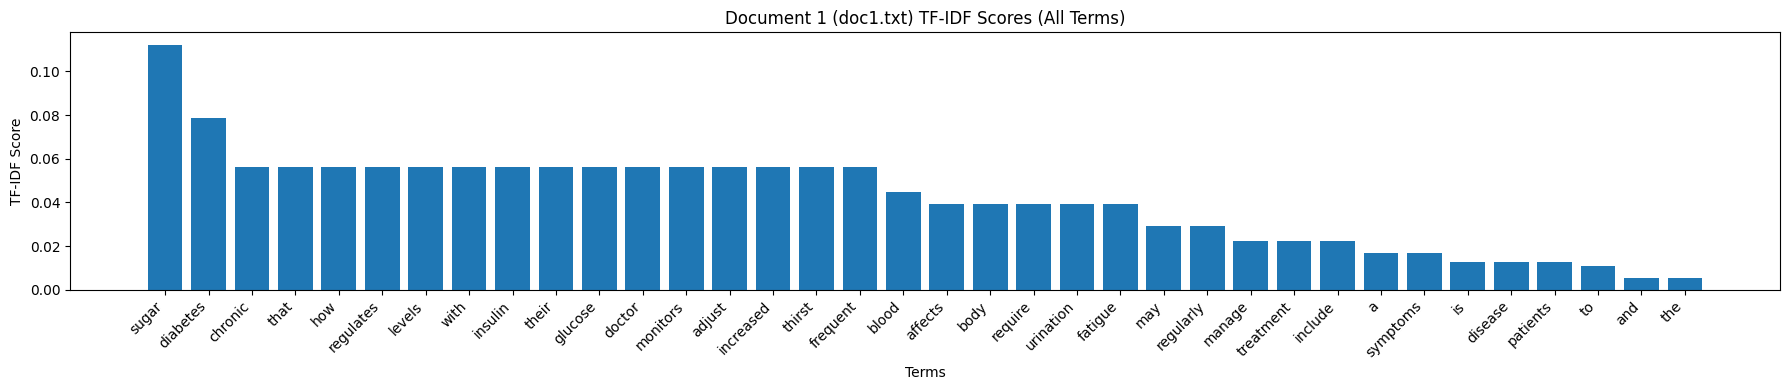

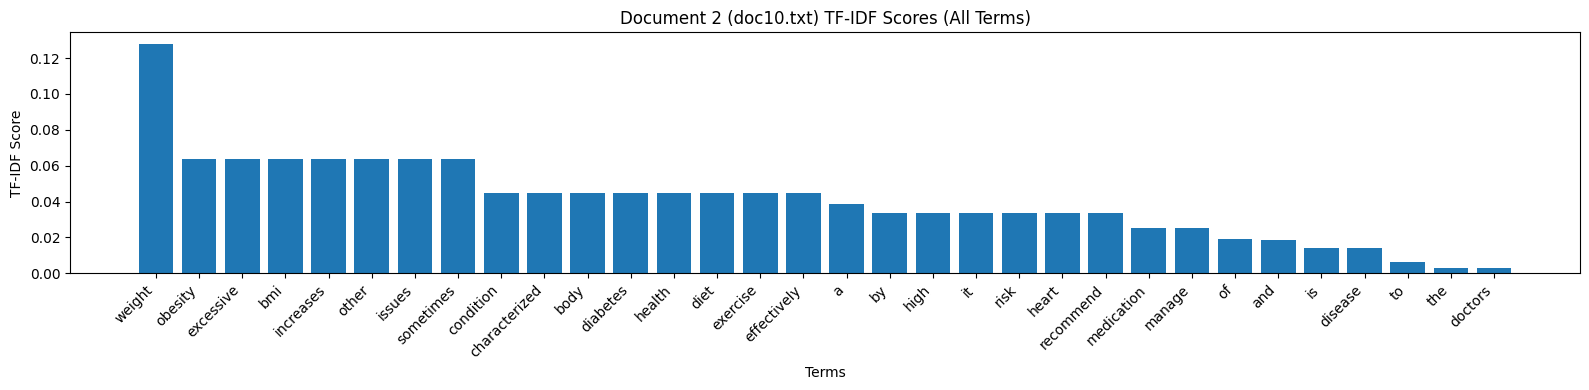

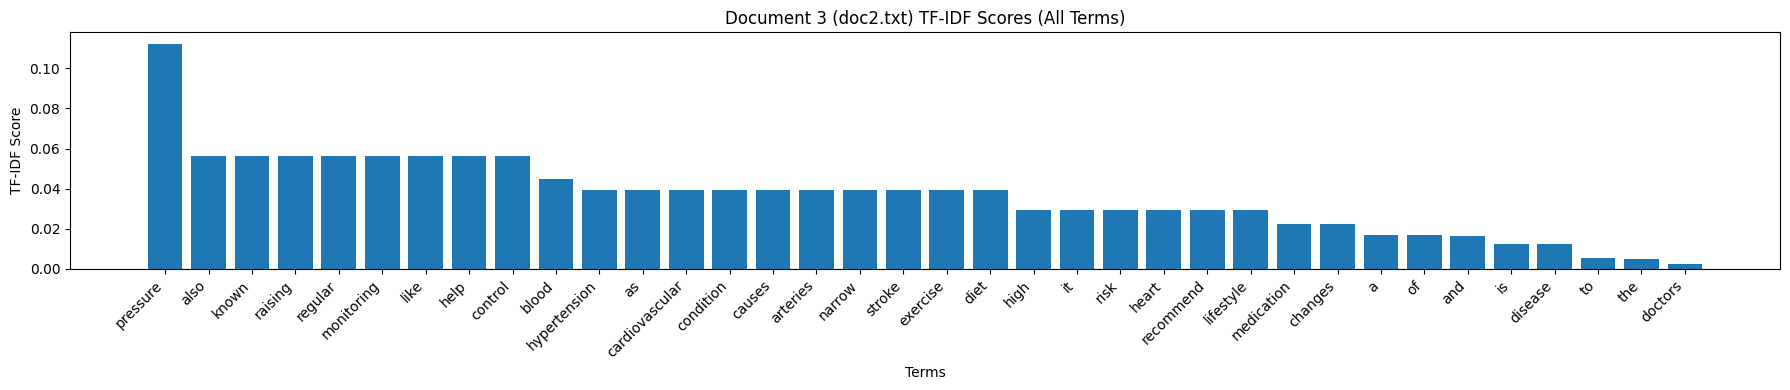

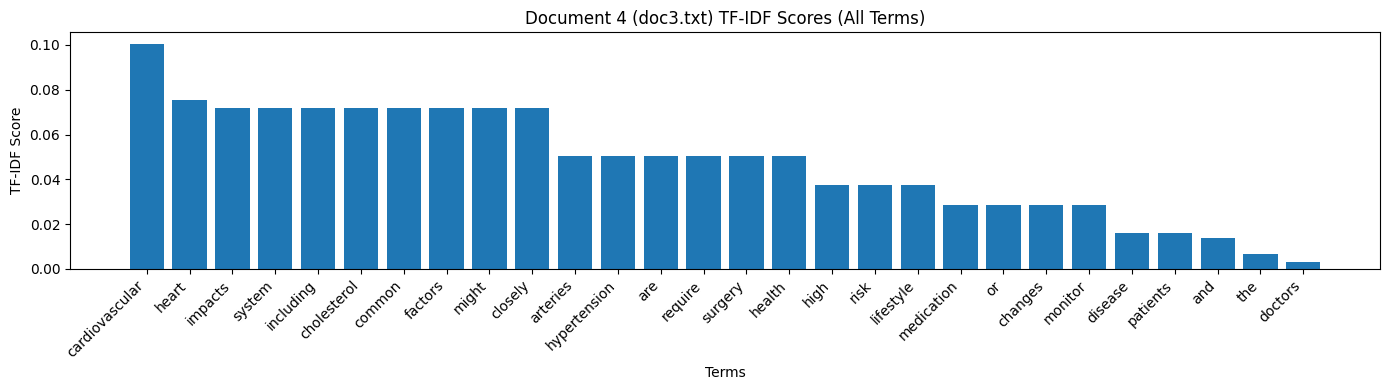

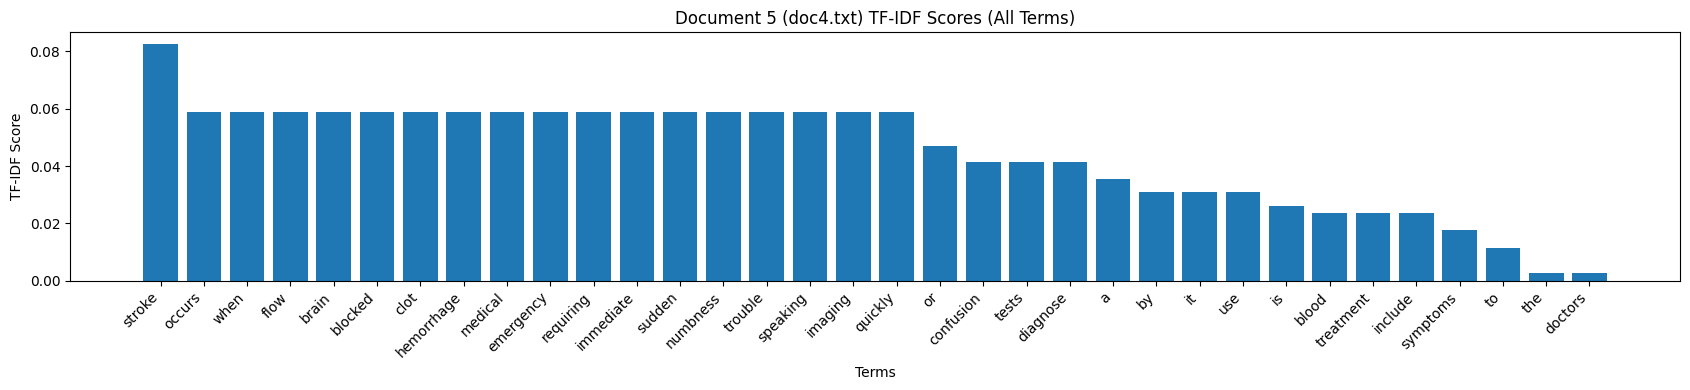

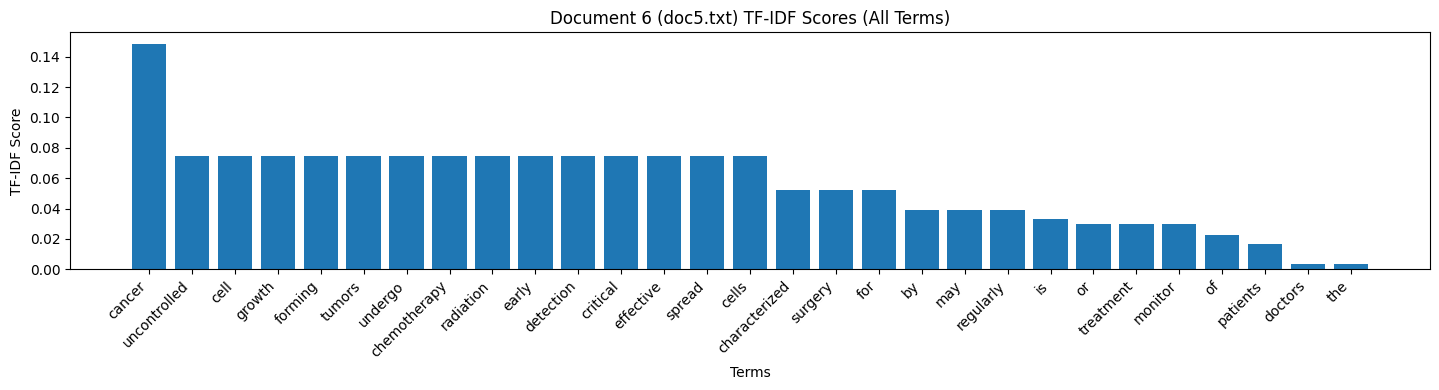

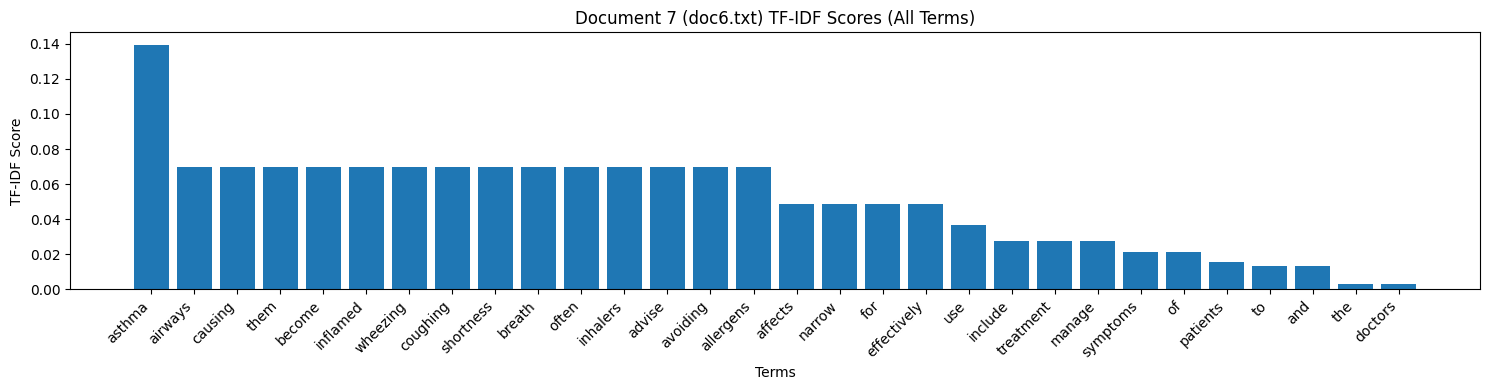

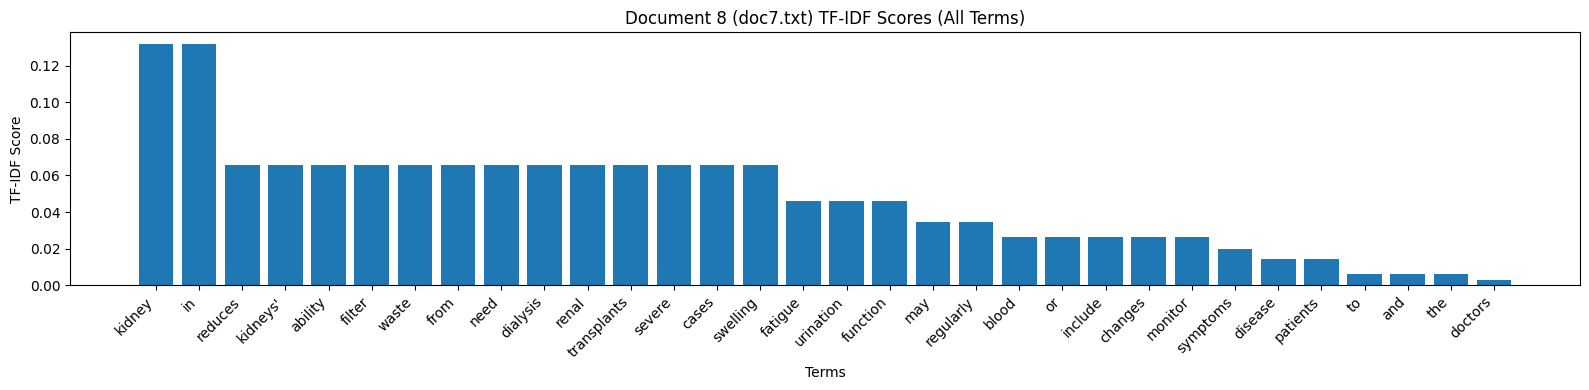

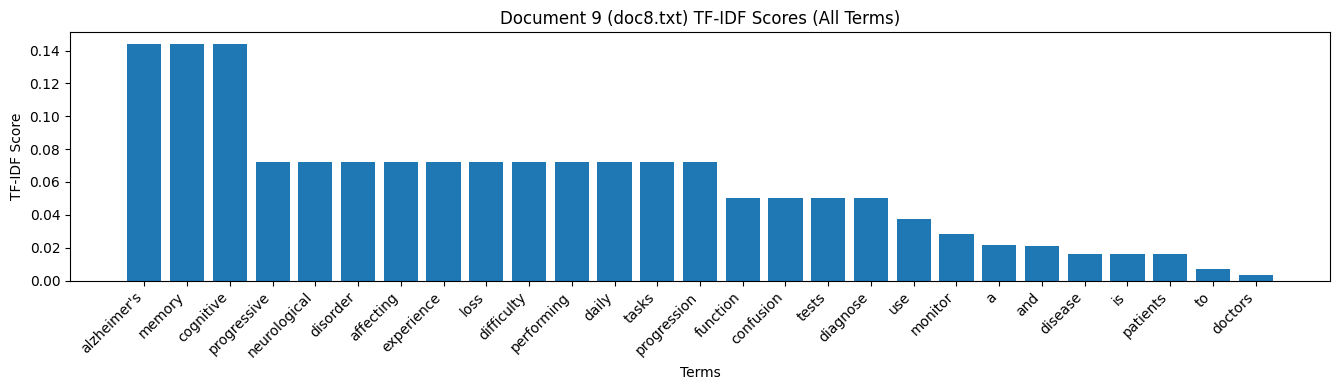

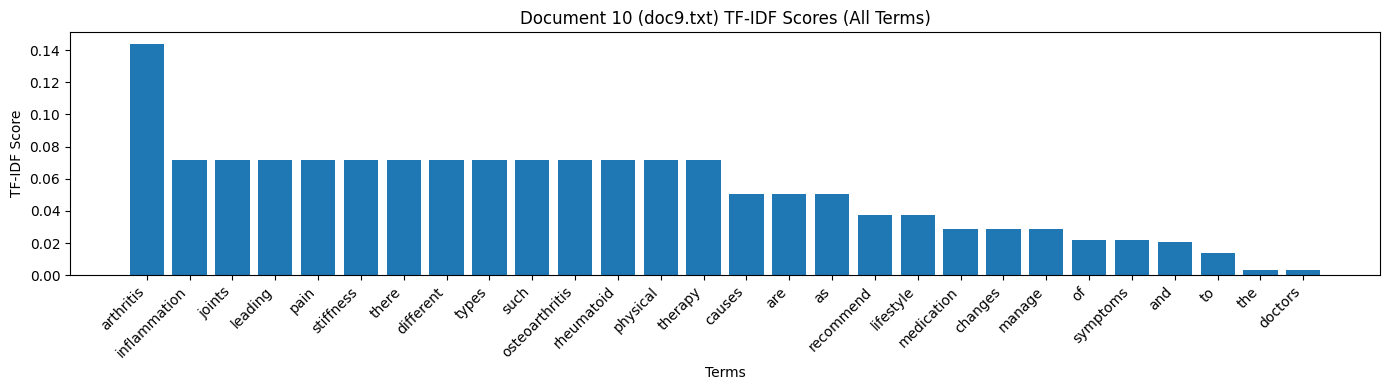

In [ ]:
for idx, tfidf in enumerate(tfidf_docs):
    sorted_tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)
    terms = [term for term, score in sorted_tfidf]
    scores = [score for term, score in sorted_tfidf]

    plt.figure(figsize=(max(8, len(terms) * 0.5), 4))
    plt.bar(terms, scores)
    plt.title(f'Document {idx + 1} ({file_names[idx]}) TF-IDF Scores (All Terms)')
    plt.xlabel('Terms')
    plt.ylabel('TF-IDF Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 9️⃣ Create TF-IDF Table (DataFrame)

In [ ]:
all_terms = sorted(set(term for doc in tfidf_docs for term in doc))
tfidf_table = []
for tfidf in tfidf_docs:
    row = [tfidf.get(term, 0) for term in all_terms]
    tfidf_table.append(row)

df_tfidf = pd.DataFrame(tfidf_table, columns=all_terms, index=file_names)
print("\n📊 TF-IDF Table:")
df_tfidf


📊 TF-IDF Table:


,a,ability,adjust,advise,affecting,affects,airways,allergens,also,alzheimer's,...,types,uncontrolled,undergo,urination,use,waste,weight,wheezing,when,with
doc1.txt,0.016906,0.000000,0.056161,0.000000,0.000000,0.039255,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.039255,0.000000,0.000000,0.000000,0.000000,0.000000,0.056161
doc10.txt,0.038508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127921,0.000000,0.000000,0.000000
doc2.txt,0.016906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056161,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc3.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc4.txt,0.035546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.030871,0.000000,0.000000,0.000000,0.059041,0.000000
doc5.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.074277,0.074277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc6.txt,0.000000,0.000000,0.000000,0.069775,0.000000,0.048771,0.069775,0.069775,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.036484,0.000000,0.000000,0.069775,0.000000,0.000000
doc7.txt,0.000000,0.065788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045984,0.000000,0.065788,0.000000,0.000000,0.000000,0.000000
doc8.txt,0.021661,0.000000,0.000000,0.000000,0.071956,0.000000,0.000000,0.000000,0.000000,0.143912,...,0.000000,0.000000,0.000000,0.000000,0.037624,0.000000,0.000000,0.000000,0.000000,0.000000
doc9.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 🔟 Search Query Using Cosine Similarity

In [ ]:
def search(query, idf_dict, all_terms, df_tfidf):
    query_tokens = tokenize(query)

    # TF for Query
    query_tf = {}
    total_terms = len(query_tokens)
    for word in query_tokens:
        query_tf[word] = query_tf.get(word, 0) + 1
    for word in query_tf:
        query_tf[word] /= total_terms

    # TF-IDF Query
    query_tfidf = {term: query_tf.get(term, 0) * idf_dict.get(term, 0) for term in all_terms}
    query_vector = np.array([query_tfidf.get(term, 0) for term in all_terms])

    # Cosine Similarity
    doc_vectors = df_tfidf.to_numpy()
    similarities = cosine_similarity([query_vector], doc_vectors).flatten()

    ranked_docs = sorted(zip(df_tfidf.index, similarities), key=lambda x: x[1], reverse=True)

    print(f"\n🔎 Search Results for Query: '{query}'")
    for filename, score in ranked_docs:
        print(f"{filename}: Similarity = {score:.4f}")

In [ ]:
query = input("Query: ")

search(query, idf, all_terms, df_tfidf)

Query: Stroke and blood

🔎 Search Results for Query: 'Stroke and blood'
doc4.txt: Similarity = 0.2920
doc2.txt: Similarity = 0.2309
doc1.txt: Similarity = 0.0798
doc7.txt: Similarity = 0.0422
doc10.txt: Similarity = 0.0083
doc9.txt: Similarity = 0.0078
doc8.txt: Similarity = 0.0069
doc3.txt: Similarity = 0.0059
doc6.txt: Similarity = 0.0051
doc5.txt: Similarity = 0.0000
